In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
# read the csv

people = pd.read_csv('upwork_expertise.csv', thousands = ',')

people.head()

,web-scraper-order,web-scraper-start-url,salary,earned,profile_url,profile_url-href,skill,test,detail,nationality
0,1535992796-1710,https://www.upwork.com/o/profiles/browse/?q=da...,$49.00,$100k+,6 more,https://www.upwork.com/o/profiles/users/_~0103...,"[{""skill"":""Shopify""},{""skill"":""Yii""},{""skill"":...","[{""test"":""oDesk Readiness Test for Independent...",20+ Shopify apps were developed by me. I am wo...,Russia
1,1535986724-1043,https://www.upwork.com/o/profiles/browse/?q=da...,$25.00,$80k+,5 more,https://www.upwork.com/o/profiles/users/_~01fe...,"[{""skill"":""ColdFusion""},{""skill"":""PHP""},{""skil...","[{""test"":""oDesk Readiness Test for Independent...",I am a Fullstack Developer/Team Lead with over...,Philippines
2,1535988051-1378,https://www.upwork.com/o/profiles/browse/?q=da...,$5.00,$10k+,NaN,NaN,NaN,NaN,NaN,Philippines
3,1535992640-1671,https://www.upwork.com/o/profiles/browse/?q=da...,$40.00,$10k+,1 more,https://www.upwork.com/o/profiles/users/_~0184...,"[{""skill"":""JavaScript""},{""skill"":""Google Apps""...",[],"I'm Nate, a Web Developer that has been design...",United States
4,1535988326-1465,https://www.upwork.com/o/profiles/browse/?q=da...,$5.56,$30k+,6 more,https://www.upwork.com/o/profiles/users/_~01b6...,"[{""skill"":""Data Entry""},{""skill"":""Data Analyti...","[{""test"":""oDesk Readiness Test for Agency Cont...",Computer literate having graduated a 4 years c...,Philippines


In [4]:
# Overview
people.describe()

,web-scraper-order,web-scraper-start-url,salary,earned,profile_url,profile_url-href,skill,test,detail,nationality
count,865,865,865,861,773,773,773,773,771,865
unique,865,109,229,29,6,773,773,598,770,81
top,1535988016-1366,https://www.upwork.com/o/profiles/browse/?q=da...,$20.00,$10k+,6 more,https://www.upwork.com/o/profiles/users/_~0187...,"[{""skill"":""Presentations""},{""skill"":""Microsoft...",[],"Hello there, \n\nI am a computer science grad...",United States
freq,1,10,47,216,510,1,1,92,2,149


In [5]:
## 1. Nationality 
people['nationality'].describe()

count               865
unique               81
top       United States
freq                149
Name: nationality, dtype: object

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


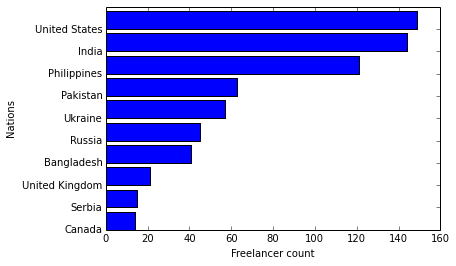

In [6]:
counter = Counter(people['nationality'])
top10 = counter.most_common(10)

nations = [x[0] for x in top10]
nations = nations[::-1]
nation_counts = [x[1] for x in top10]
nation_counts = nation_counts[::-1]
# Plot histogram using matplotlib bar().
x_pos = [i for i, _ in enumerate(nations)]

fig = plt.figure()
plt.barh(x_pos, nation_counts, color = 'blue')
plt.ylabel("Nations")
plt.xlabel("Freelancer count")
plt.yticks(x_pos, nations)

plt.show()

In [7]:
# 2. Skills
people['skill'].describe()
people['skill'].head()

0    [{"skill":"Shopify"},{"skill":"Yii"},{"skill":...
1    [{"skill":"ColdFusion"},{"skill":"PHP"},{"skil...
2                                                  NaN
3    [{"skill":"JavaScript"},{"skill":"Google Apps"...
4    [{"skill":"Data Entry"},{"skill":"Data Analyti...
Name: skill, dtype: object

[(u'Data Entry', 130), (u'PHP', 126), (u'JavaScript', 122), (u'WordPress', 109), (u'Microsoft Excel', 106), (u'Python', 106), (u'Internet Research', 94), (u'Adobe Photoshop', 79), (u'Data Science', 77), (u'HTML5', 71)]


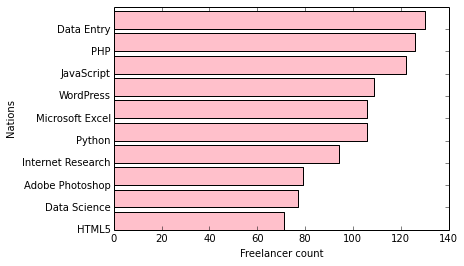

In [39]:
import json
import math
skills = people[people['skill'].notna()]['skill']
# missing data

all_skills = []
for row in skills:
    row_skills = [s['skill'] for s in json.loads(row)]
    all_skills += row_skills
    
counter = Counter(all_skills)
top10 = counter.most_common(10)

# plot
skills = [x[0] for x in top10][::-1]
skill_counts = [x[1] for x in top10][::-1]
x_pos = [i for i, _ in enumerate(top10)]
fig = plt.figure()
plt.barh(x_pos, skill_counts, color = 'pink')
plt.ylabel("Nations")
plt.xlabel("Freelancer count")
plt.yticks(x_pos, skills)

print top10

([<matplotlib.axis.YTick at 0x10c00b810>,
 <a list of 10 Text yticklabel objects>)

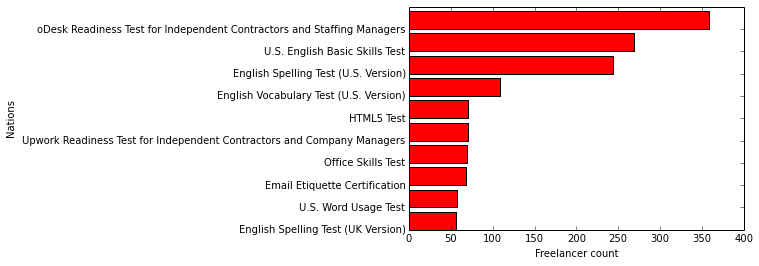

In [43]:
# 3. Tests
tests = people[people['test'].notna()]['test']
all_tests = []
for row in tests:
    row_tests = [t['test'] for t in json.loads(row)]
    all_tests += row_tests

counter = Counter(all_tests)
top10 = counter.most_common(10)

tests = [x[0] for x in top10][::-1]
test_counts = [x[1] for x in top10][::-1]
x_pos = [i for i, _ in enumerate(top10)]
#fig = plt.figure()
plt.barh(x_pos, test_counts, color = 'red')
plt.ylabel("Nations")
plt.xlabel("Freelancer count")
plt.yticks(x_pos, tests)


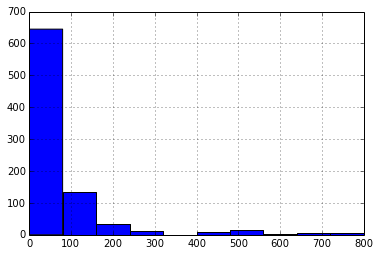

In [36]:
# 4. earnings
# data cleaning, only number remains
valid = '1234567890.' 
def sanitize(data):
    filtered = filter(lambda char: char in valid, data)
    return float(''.join(filtered))

earnings = people['earned'].dropna().apply(sanitize)

earnings.sort_values(ascending = True)

# histgram of earnings.
earnings.hist()


In [ ]:
#5 The conclusion

Nationality, skills, tests, earnings, salaries
